# Image Classification With Deep Learning

In [1]:
import keras 
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [2]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)


In [3]:
xtrain=xtrain.reshape(60000,28*28)
xtest=xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [4]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [5]:
xtrain=xtrain/255.
xtest=xtest/255.

In [6]:
import keras
num_classes=10
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [7]:
ytrain.shape

(60000, 10)

In [8]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [10]:
history=model.fit(xtrain,ytrain,
                 batch_size=128,
                 epochs=20,
                 verbose=2,
                 validation_data=(xtest,ytest))

score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 9s - loss: 0.5664 - accuracy: 0.7916 - val_loss: 0.5352 - val_accuracy: 0.8070 - 9s/epoch - 20ms/step
Epoch 2/20
469/469 - 8s - loss: 0.3852 - accuracy: 0.8588 - val_loss: 0.3964 - val_accuracy: 0.8593 - 8s/epoch - 16ms/step
Epoch 3/20
469/469 - 7s - loss: 0.3402 - accuracy: 0.8738 - val_loss: 0.3942 - val_accuracy: 0.8581 - 7s/epoch - 15ms/step
Epoch 4/20
469/469 - 7s - loss: 0.3115 - accuracy: 0.8828 - val_loss: 0.3634 - val_accuracy: 0.8725 - 7s/epoch - 15ms/step
Epoch 5/20
469/469 - 7s - loss: 0.2914 - accuracy: 0.8914 - val_loss: 0.3349 - val_accuracy: 0.8734 - 7s/epoch - 15ms/step
Epoch 6/20
469/469 - 7s - loss: 0.2747 - accuracy: 0.8971 - val_loss: 0.3611 - val_accuracy: 0.8780 - 7s/epoch - 16ms/step
Epoch 7/20
469/469 - 7s - loss: 0.2634 - accuracy: 0.9007 - val_loss: 0.3529 - val_accuracy: 0.8741 - 7s/epoch - 16ms/step
Epoch 8/20
469/469 - 7s - loss: 0.2495 - accuracy: 0.9048 - val_loss: 0.3556 - val_accuracy: 0.8832 - 7s/epoch - 14ms/step
Epoch 9/20
469/4

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ypred=model.predict(xtest)
ypred =(ypred>0.5) 
list(ypred)

313/313 [==============================] - 1s 4ms/step


[array([False, False, False, False, False, False, False, False, False,
         True]),
 array([False, False,  True, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False, False, False, False, False,  True, False, False, False,
        False]),
 array([False, False, False, False, False, False, False,  True, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, Fal

In [12]:
print('classification report:\n',classification_report(ytest,ypred))

classificatio report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.95      0.81      0.87      1000
           4       0.85      0.78      0.81      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.66      0.70      1000
           7       0.96      0.96      0.96      1000
           8       0.96      0.99      0.97      1000
           9       0.97      0.96      0.96      1000

   micro avg       0.90      0.88      0.89     10000
   macro avg       0.90      0.88      0.89     10000
weighted avg       0.90      0.88      0.89     10000
 samples avg       0.88      0.88      0.88     10000



C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import multilabel_confusion_matrix

print('confusion matrix:\n', multilabel_confusion_matrix(ytest, ypred))

confusion matrix:
 [[[8759  241]
  [ 134  866]]

 [[8989   11]
  [  26  974]]

 [[8788  212]
  [ 160  840]]

 [[8957   43]
  [ 195  805]]

 [[8867  133]
  [ 223  777]]

 [[8983   17]
  [  28  972]]

 [[8784  216]
  [ 343  657]]

 [[8957   43]
  [  35  965]]

 [[8960   40]
  [  14  986]]

 [[8966   34]
  [  41  959]]]


# House price prediction with Neural Networks

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [19]:
df = pd.read_csv('House_prices.csv')
df

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1982,1.0,3,2.00,133,0,142212
1,1676,1.5,3,0.38,14,1,134865
2,1694,2.0,3,0.96,15,1,118007
3,1800,1.0,2,0.48,49,1,138297
4,2088,1.0,3,1.84,29,1,129470
...,...,...,...,...,...,...,...
1042,1802,2.0,4,0.97,56,1,107695
1043,3239,3.5,4,2.50,1,1,236737
1044,1440,2.0,2,0.61,66,1,154829
1045,2030,2.5,3,1.00,3,1,179492


C:\Users\Uday\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


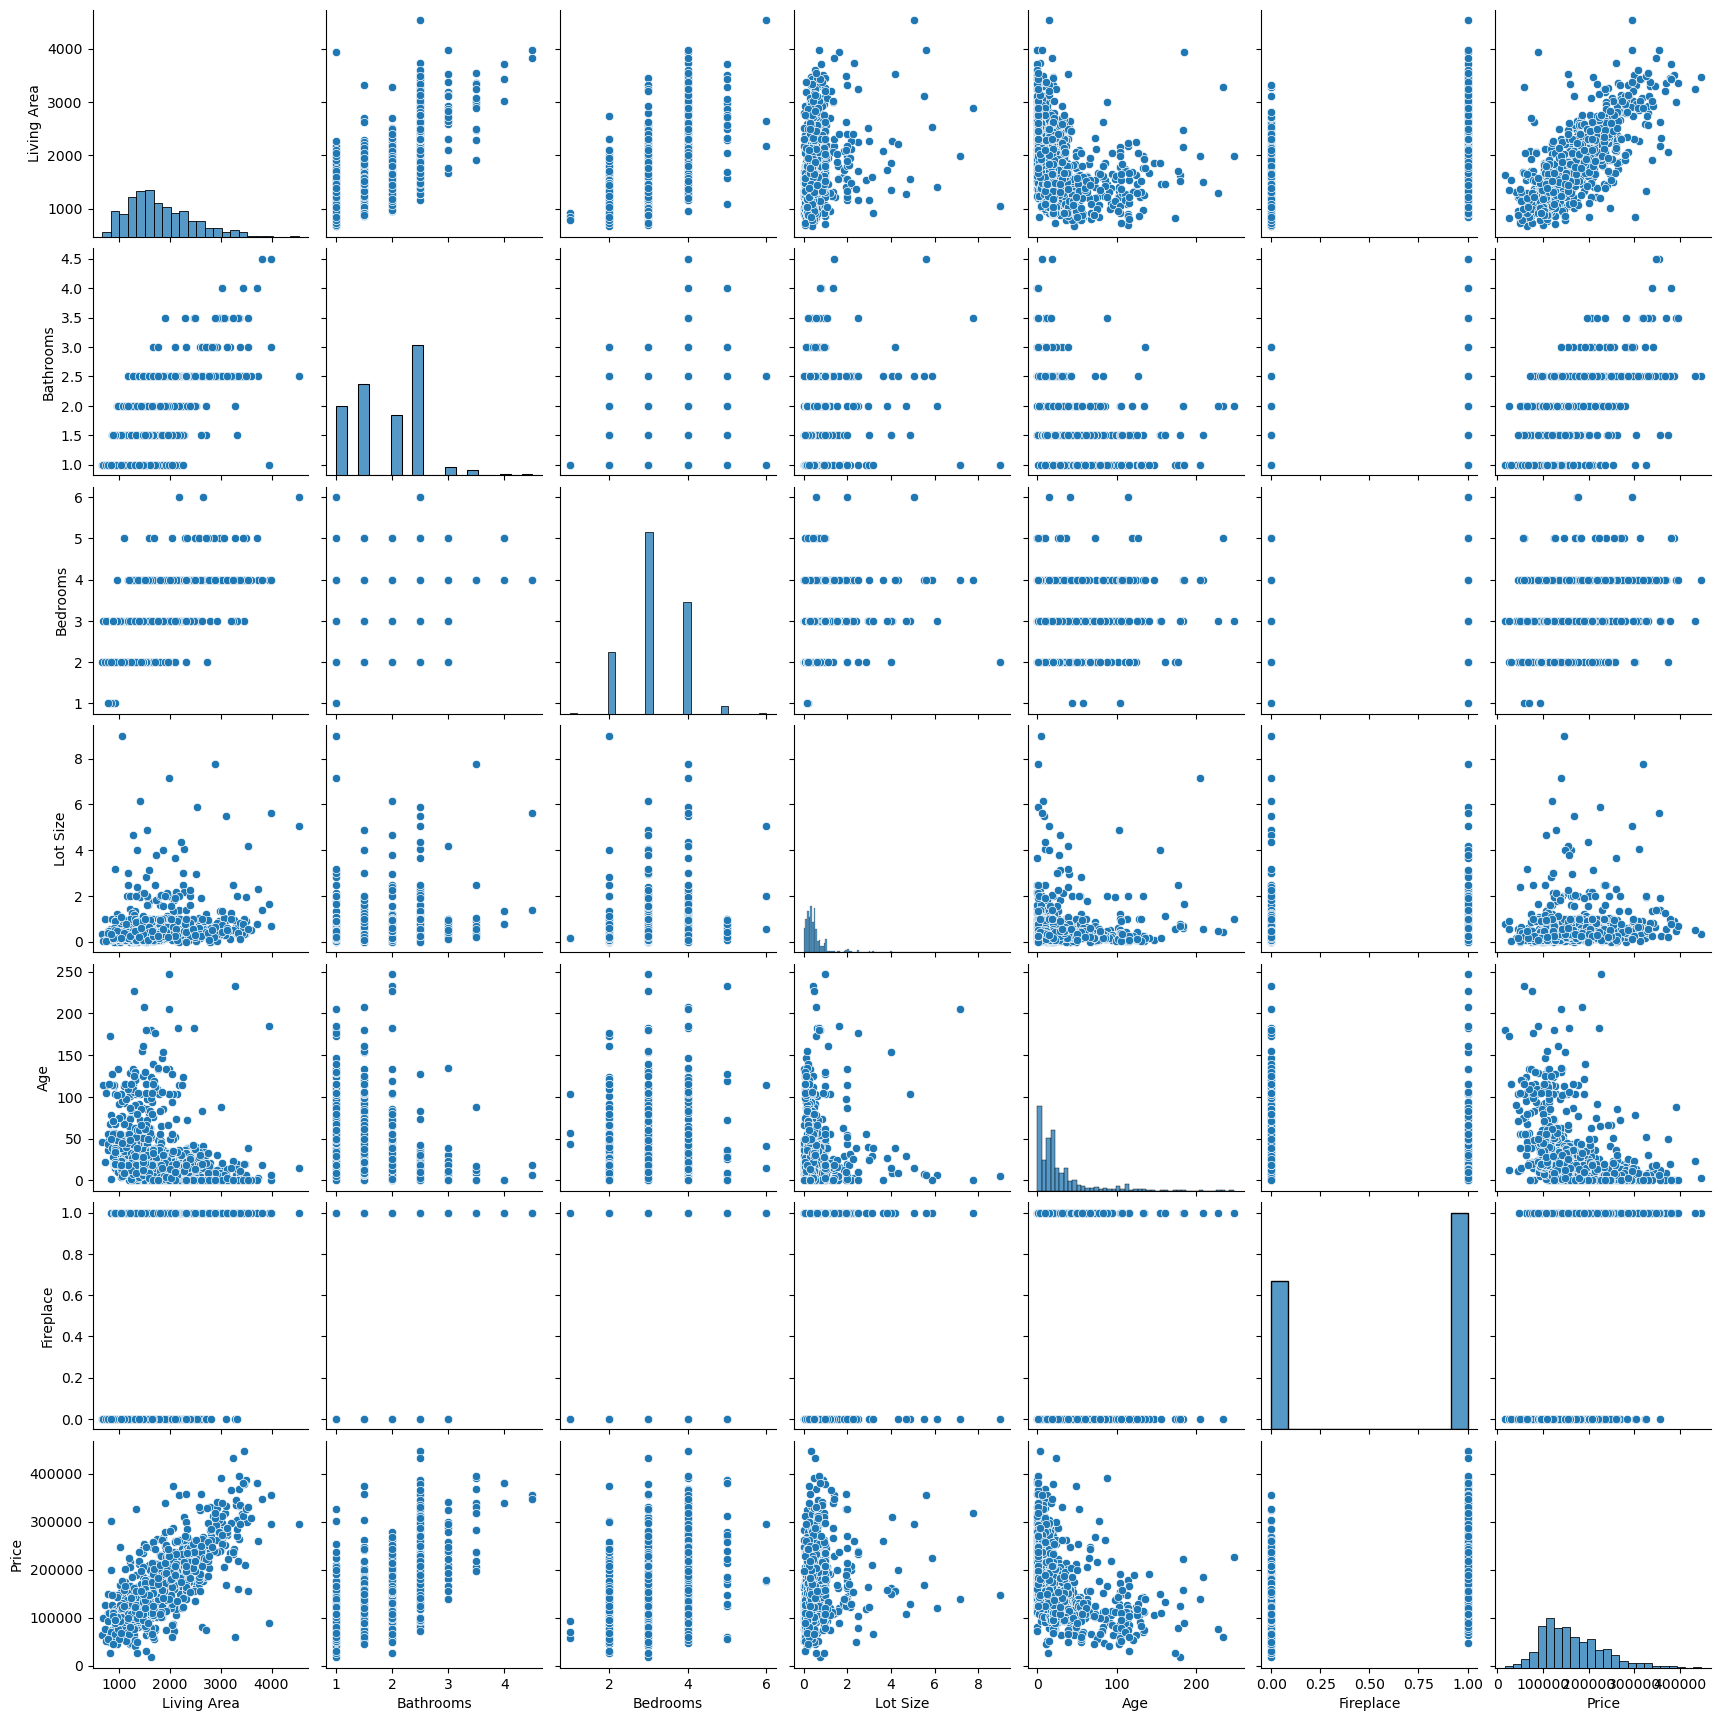

In [20]:
sns.pairplot(df)

In [21]:
df.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1982,1.0,3,2.00,133,0,142212
1,1676,1.5,3,0.38,14,1,134865
2,1694,2.0,3,0.96,15,1,118007
3,1800,1.0,2,0.48,49,1,138297
4,2088,1.0,3,1.84,29,1,129470


In [23]:
df.isna().sum()

Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
Price          0
dtype: int64

In [25]:
objcol=df.select_dtypes(include = 'object')

In [26]:
for i in objcol:
    data[i] = data[i].map({'yes':1 ,'no':0})

In [28]:
x=df.iloc[:,:3]
x.head()

,Living Area,Bathrooms,Bedrooms
0,1982,1.0,3
1,1676,1.5,3
2,1694,2.0,3
3,1800,1.0,2
4,2088,1.0,3


In [29]:
y=df.iloc[:,-1:]
y.head()

,Price
0,142212
1,134865
2,118007
3,138297
4,129470


In [30]:
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(837, 3)

(837, 1)

(210, 3)

(210, 1)


In [35]:
model = Sequential()
model.add(Dense(11, input_shape=(3,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                44        
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
27/27 [==============================] - 1s 2ms/step - loss: 31572465664.0000 - mean_squared_error: 31572465664.0000
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 31562180608.0000 - mean_squared_error: 31562180608.0000
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 31545604096.0000 - mean_squared_error: 31545604096.0000
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 31520557056.0000 - mean_squared_error: 31520557056.0000
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 31485806592.0000 - mean_squared_error: 31485806592.0000
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 31441381376.0000 - mean_squared_error: 31441381376.0000
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 31386355712.0000 - mean_squared_error: 31386355712.0000
Epoch 8/20
27/27 [==============================] - 0s 3ms/step - loss: 31321311232.0000 - mean_squared_

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

pred= model.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred)))
print(r2_score(ytest,pred))

7/7 [==============================] - 0s 2ms/step
170163.9504987117
-4.97660747020445
